http://kieranrcampbell.github.io/gibbs-sampling-bayesian-linear-regression/

In [1]:
import numpy as np

%matplotlib inline
from seaborn import plt
import pandas as pd
plt.rcParams['figure.figsize'] = (10, 5)

**Modelo**: $$\Large Y = \alpha + \beta * X + \epsilon$$
donde
$$\epsilon \sim N(0, \sigma^2)$$

Además, proponemos como **PRIORS** que:
$$\alpha \sim N(\mu_0, \sigma_0^2)$$
$$\beta \sim N(\mu_1, \sigma_1^2)$$
y
$$\tau = \frac{1}{\sigma}= \sim Gamma(a,b)$$

Las probabilidades **condicionales** para los 3 parámetros son:

In [2]:
def sample_alfa(y, x, beta, tau, mu_0, tau_0):
    N = len(y)
    assert len(x) == N
    precision = tau_0 + tau * N
    mean = tau_0 * mu_0 + tau * np.sum(y - beta * x)
    mean /= precision
    return np.random.normal(mean, 1 / np.sqrt(precision))

In [3]:
def sample_beta(y, x, alfa, tau, mu_1, tau_1):
    N = len(y)
    assert len(x) == N
    precision = tau_1 + tau * np.sum(x * x)
    mean = tau_1 * mu_1 + tau * np.sum( (y - alfa) * x)
    mean /= precision
    return np.random.normal(mean, 1 / np.sqrt(precision))

In [4]:
def sample_tau(y, x, alfa, beta, a, b):
    N = len(y)
    a_new = a + N / 2
    resid = y - alfa - beta * x
    b_new = b + np.sum(resid * resid) / 2
    return np.random.gamma(a_new, 1 / b_new)

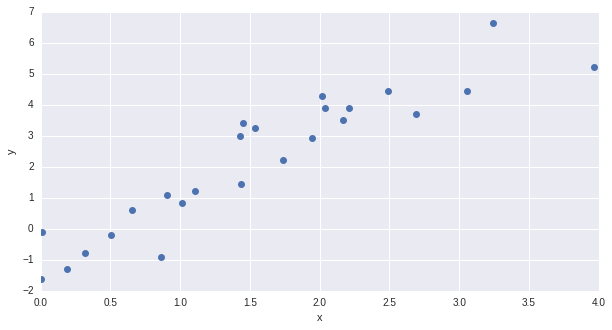

In [5]:
alfa_true = -1
beta_true = 2
tau_true = 1

N = 25
x = np.random.uniform(low = 0, high = 4, size = N)
y = np.random.normal(alfa_true + beta_true * x, 1 / np.sqrt(tau_true))

synth_plot = plt.plot(x, y, "o")
plt.xlabel("x")
plt.ylabel("y")

In [6]:
## specify initial values
init = {"alfa": 0,
        "beta": 0,
        "tau": 2}

## specify hyper parameters
hypers = {"mu_0": 0,
         "tau_0": 1,
         "mu_1": 0,
         "tau_1": 1,
         "a": 2,
         "b": 1}

In [7]:
def gibbs(y, x, iters, init, hypers):
    assert len(y) == len(x)
    alfa = init["alfa"]
    beta = init["beta"]
    tau = init["tau"]
    
    trace = np.zeros((iters, 3)) ## trace to store values of beta_0, beta_1, tau
    
    for it in range(iters):
        
        # fijo beta y tau y sorteo alfa
        alfa = sample_alfa(y, x, beta, tau, hypers["mu_0"], hypers["tau_0"])
        
        # fijo alfa y tau y sorteo beta
        beta = sample_beta(y, x, alfa, tau, hypers["mu_1"], hypers["tau_1"])
        
        # fijo alfa y beta y sorteo tau
        tau = sample_tau(y, x, alfa, beta, hypers["a"], hypers["b"])
        
        # guardo los datos:
        trace[it,:] = np.array((alfa, beta, tau))
        
    trace = pd.DataFrame(trace)
    
    trace.columns = ['alfa', 'beta', 'tau']
        
    return trace

In [8]:
iters = 20
trace = gibbs(y, x, iters, init, hypers)

KeyError: 0

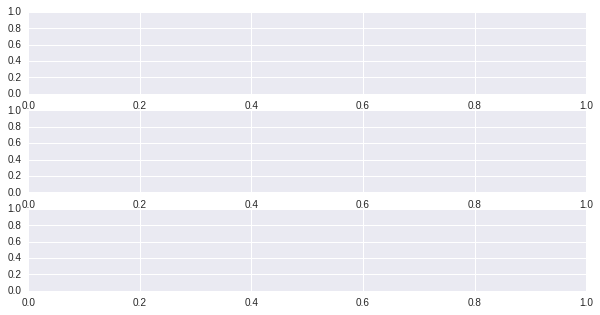

In [9]:
f, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.scatter(trace[0], trace[1], color='b', s=40)
ax1.plot(trace[0], trace[1], '-')

ax2.scatter(trace[0], trace[2], color='r', s=40)
ax2.plot(trace[0], trace[2], '-r')

ax3.scatter(trace[1], trace[2], color='g', s=40)
ax3.plot(trace[1], trace[2], '-g')

plt.show()

In [10]:
iters = 10000
trace = gibbs(y, x, iters, init, hypers)

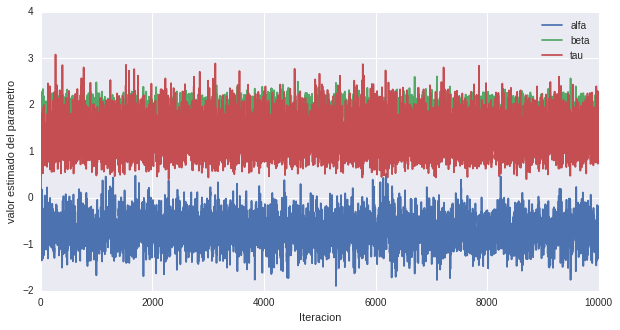

In [11]:
traceplot = trace.plot()
traceplot.set_xlabel("Iteracion")
traceplot.set_ylabel("valor estimado del parametro")

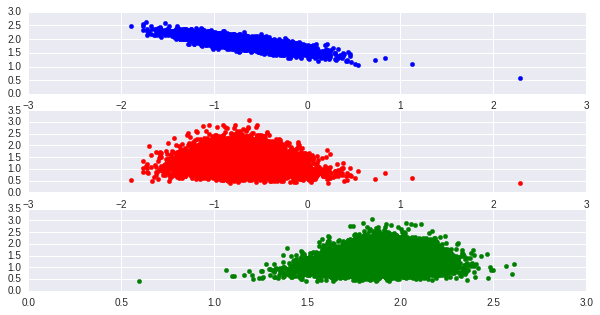

In [12]:
f, (ax1, ax2, ax3) = plt.subplots(3,1)
ax1.scatter(trace['alfa'], trace['beta'], color='blue')
ax2.scatter(trace['alfa'], trace['tau'], color='red')
ax3.scatter(trace['beta'], trace['tau'], color='green')
plt.show()

alfa   -0.704595
beta    1.885797
tau     1.308357
dtype: float64


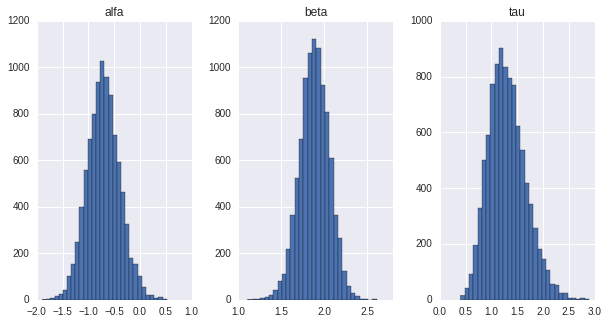

In [13]:
trace_burnt = trace[500:(iters-1)]
hist_plot = trace_burnt.hist(bins = 30, layout = (1,3))

m = trace_burnt.mean()

print(trace_burnt.mean())

[-1, 4]
[-3, 7]


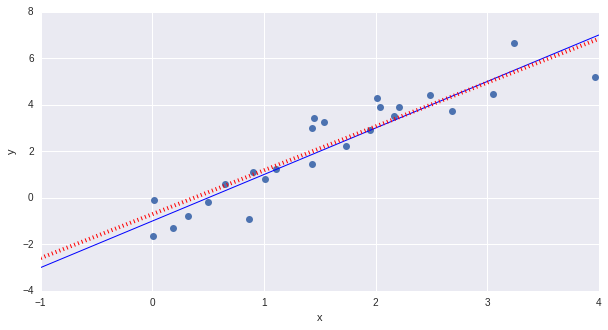

In [14]:
synth_plot = plt.plot(x, y, "o")
plt.xlabel("x")
plt.ylabel("y")

xt = [-1,4]
yt = [alfa_true + beta_true*s for s in xt]  # verdadera
yg = [m[0] + m[1]*s for s in xt]            # estimada

print (xt)
print (yt)

plt.plot(xt,yt, 'b-', lw=1)
plt.plot(xt,yg, 'r:', lw=4)